## CS/INFO 5304 Assignment 1: Data Preparation <br />


In [ ]:
from google.colab import files
files.upload()

{}

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, chi2_contingency

In [ ]:
## Case 1 Problem A code (and optional graph)
import pandas as pd
individual_data = pd.read_pickle('/content/Extrasensory_individual_data.p', compression='infer', storage_options=None)

In [ ]:
sensory = pd.read_pickle('/content/Extrasensory_sensor_data.p')
sensory['3600D531-0C55-44A7-AE95-A7A38519464E']

,location:raw_latitude,location:raw_longitude,raw_acc:3d:mean_x,raw_acc:3d:mean_y,raw_acc:3d:mean_z,discrete:app_state:is_active,discrete:app_state:is_inactive,discrete:app_state:is_background,discrete:app_state:missing,lf_measurements:battery_level
0,32.882483,-117.234601,0.022972,-0.002678,-1.002311,0.0,1.0,0.0,0.0,0.49
1,32.882480,-117.234595,0.021403,-0.002784,-1.001535,0.0,0.0,1.0,0.0,0.50
2,32.882482,-117.234587,0.021201,-0.004036,-1.000577,0.0,1.0,0.0,0.0,0.56
3,32.882482,-117.234587,0.021530,-0.004327,-0.998347,1.0,0.0,0.0,0.0,0.56
4,32.882483,-117.234582,0.021198,-0.004350,-1.004198,0.0,1.0,0.0,0.0,0.57
...,...,...,...,...,...,...,...,...,...,...
5198,32.879546,-117.237555,-0.059023,1.008478,-0.027813,0.0,0.0,1.0,0.0,0.65
5199,32.880290,-117.237482,-0.147803,-0.061424,-0.851655,0.0,0.0,1.0,0.0,0.65
5200,32.880383,-117.236507,-0.104133,1.043514,-0.040201,0.0,0.0,1.0,0.0,0.64
5201,32.880894,-117.235780,-0.097580,1.045405,-0.055839,0.0,0.0,1.0,0.0,0.64


In [ ]:
individual_data['actual_average_screen_time']

0      5.18
1      2.31
2     -1.00
3      4.75
4      1.55
5      3.69
6      4.72
7     -1.00
8      3.01
9      3.32
10     2.67
11     4.56
12     4.13
13     3.62
14     3.49
15    10.78
16     1.60
17     4.43
18     3.59
19     4.06
20     4.02
21     2.58
22     3.34
23     3.72
24     5.07
25     3.39
26     2.73
27    -1.00
28     3.66
29     3.27
30     3.23
31     3.23
32     6.06
33     4.22
34     2.85
35     1.49
36     4.08
37     3.73
38     2.57
39     3.71
40     5.17
41     5.69
42     5.05
43     2.73
44    11.63
45     5.94
46     4.76
47     4.62
48     4.17
49     3.87
50    -1.00
51     3.74
52     3.30
53     4.56
54     2.65
55     2.20
56     3.65
57     4.49
58     4.09
59     1.76
Name: actual_average_screen_time, dtype: float64

### Case 1: Actual screen time


In [ ]:
# find the data type of the column
print("Data type of the column:", individual_data['actual_average_screen_time'].dtypes)

Data type of the column: float64


In [ ]:
# from above, it's fair to conclude that there are no blank string values in the column
# and as we can see from the output below, the actual_average_screen_time does not have missing values equal to None or NaN
print("Number of null values in the column:", individual_data['actual_average_screen_time'].isnull().sum())

Number of null values in the column: 0


In [ ]:
# now since the screen time is a float value, and it should be non-negative, we look for negative values in the column
number_of_neg_values = (individual_data['actual_average_screen_time'] < 0).sum()
print("Number of negative values in the column:", number_of_neg_values)

Number of negative values in the column: 4


In [ ]:
# thus, we find that the missing values in this column are represented as negative values. what are those values? 
# let's find out
negative_value_rows = individual_data[individual_data['actual_average_screen_time'] < 0]
negative_values = negative_value_rows['actual_average_screen_time']

print("The negative values in the column are:\n", negative_values)

The negative values in the column are:
 2    -1.0
7    -1.0
27   -1.0
50   -1.0
Name: actual_average_screen_time, dtype: float64


#### Writeup Answer to Problem A: 
How are missing values represented for this feature?


Thus, the missing values in the actual_average_screen_time feature are represented as -1.

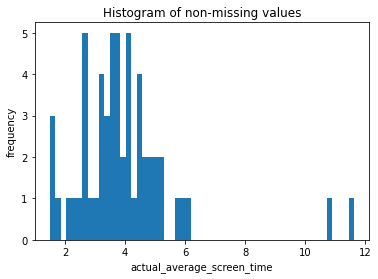

In [ ]:
## Case 1 Problem B code and graph
import matplotlib.pyplot as plt 
def plot_hist(values):
  plt.hist(values, bins=56)
  plt.title('Histogram of non-missing values')
  plt.xlabel('actual_average_screen_time')
  plt.ylabel('frequency')
  plt.show()
non_missing_values = individual_data[individual_data['actual_average_screen_time'] > 0]['actual_average_screen_time']
plot_hist(non_missing_values)

In [ ]:
q1 = non_missing_values.quantile(0.25)
q3 = non_missing_values.quantile(0.75)
iqr = q3 - q1
print("The inter quartile range is:", iqr)

lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
outliers = non_missing_values[(non_missing_values > upper_bound) | (non_missing_values < lower_bound)]
print("Number of outliers in the column:", len(outliers))

# to check skewness, we use pandas skew function
skewness_value = non_missing_values.skew()
print("The skewness value is:", skewness_value)

The inter quartile range is: 1.3849999999999998
Number of outliers in the column: 2
The skewness value is: 2.4639261915800215


#### Writeup Answer to Problem B: 
 Does it have outliers?If so, how many?
 Is it skewed? If so, is it left skewed or right skewed? What’s the skewness? 

Yes, the column does have outliers. It has 2 outliers. The column is right skewed with a skewness value of 2.4639261915800215.

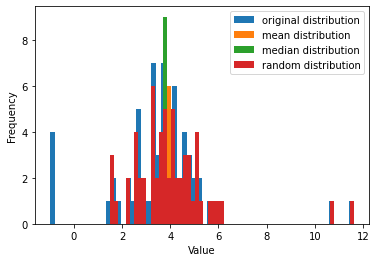

In [ ]:
## Case 1 Problem C code and graph
original_data = individual_data['actual_average_screen_time']
non_missing_data = original_data[original_data >= 0]

median = non_missing_data.median()
mean = non_missing_data.mean()

data_median = original_data.copy()
data_median.loc[data_median < 0] = median

data_mean = original_data.copy()
data_mean.loc[data_mean < 0] = mean

# for random values, let's consider the range of min value to max value inside the column
min_value = non_missing_data.min()
max_value = non_missing_data.max()
random_values = np.random.uniform(min_value, max_value, len(original_data) - len(non_missing_data))
data_random = original_data.copy()
data_random.loc[data_random < 0] = random_values 
plt.hist(original_data, bins=60, label='original distribution')
plt.hist(data_mean, bins=60, label='mean distribution')
plt.hist(data_median, bins=60, label='median distribution')
plt.hist(data_random, bins=60, label='random distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

#### Writeup Answer to Problem C: 
How did you choose the random value from method 3)? 
How do the distributions look like after you implement the three filling methods? (Compare them)


I chose the random values to be in the range [min_value, max_value] where these values are the minimum and the maximum values in the column respectively. 
The distributions are plotted above. Since all distributions have the same values except on 4 indices, they look largely the same. Furthermore, since the mean and the median values are very similar, the difference between their histogram plots can only be observed if we use a large number of bins in the plot method. The random values differs in only the 4 indices where it takes random values from the above specified range. Finally, only the original distribution has negative values.

In [ ]:
## Case 1 Problem D code and graph
population_distribution = np.random.normal(3.85, 1.25, len(original_data))
_, p_value_median = ttest_ind(data_median, population_distribution)
_, p_value_mean = ttest_ind(data_mean, population_distribution)
_, p_value_random = ttest_ind(data_random, population_distribution)

print(f"The p-values of the distributions are:\nMean -> {p_value_mean}\nMedian -> {p_value_median}\nRandom -> {p_value_random}")

The p-values of the distributions are:
Mean -> 0.6080116830501949
Median -> 0.5650386903299487
Random -> 0.8089760085929232


#### Answer to Problem D: 
Report the three p-values. Which one of the filling methods reconstruct this feature to be closest to the research distribution? Why do you think this is the case?


The three p-values are: 
Mean -> 0.7490699892562133 
Median -> 0.7969721432481117
Random -> 0.3676494078512619 

Filling with median seems to most closely resemble the research distribution. I belive this is the case because it's p-value is the highest amongst the three, indicating that there is a higher chance of the median-filled distribution belonging to the same population as the research distribution. Besides the p-value, it also makes sense. The randomly filled distribution has a low chance of being similar to the research data because of the randomness in the values. Furthermore, due to the presence of outliers, the mean filled data might not be the most accuracte representation. Since mean are more sensitive to outliers than median, I belive median filled data is the best distribution among the three.

### Case 2: Perceived average screen time

In [ ]:
## Case 2 Problem A code and histogram
perceived_time = individual_data['perceived_average_screen_time']
print("The data type of this column:", perceived_time.dtypes)
print("The number of null values:", pd.isnull(perceived_time).sum())
print("The number of negative values:", (perceived_time < 0).sum())
print("The negative values:", perceived_time[perceived_time <= 0])

The data type of this column: float64
The number of null values: 0
The number of negative values: 7
The negative values: 3    -1.0
15   -1.0
24   -1.0
28   -1.0
42   -1.0
44   -1.0
46   -1.0
Name: perceived_average_screen_time, dtype: float64


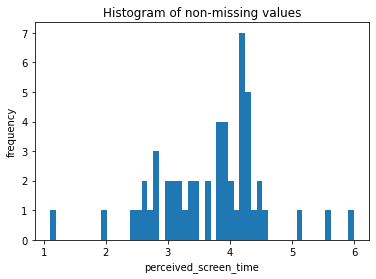

In [ ]:
non_missing_perceived_time = perceived_time[perceived_time >= 0]
plt.hist(non_missing_perceived_time, bins=53)
plt.title('Histogram of non-missing values')
plt.xlabel('perceived_screen_time')
plt.ylabel('frequency')
plt.show()

In [ ]:
q1 = non_missing_perceived_time.quantile(0.25)
q3 = non_missing_perceived_time.quantile(0.75)
iqr = q3 - q1
print("The inter quartile range is:", iqr)

lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
outliers = non_missing_perceived_time[(non_missing_perceived_time > upper_bound) | (non_missing_perceived_time < lower_bound)]
print("Number of outliers in the column:", len(outliers))

# to check skewness, we use pandas skew function
skewness_value = non_missing_perceived_time.skew()
print("The skewness value is:", skewness_value)

The inter quartile range is: 1.1
Number of outliers in the column: 2
The skewness value is: -0.21439363473731404


#### Writeup Answer to Problem B: 
 Does it have outliers?If so, how many? 
 Is it skewed? If so, is it left skewed or right skewed? What’s the skewness? 


Yes, the column does have outliers. It has 2 outliers. The column is left skewed with a skewness value of -0.21439363473731404.

In [ ]:
## Case 2 Problem B code
# Let’s define an intense phone user as someone whose average screen time is at least one standard deviation 
# larger than the mean screen usage time. How many of them are intense phone users? 
# (Note: Do not remove outliers) (Note: think of which data should be using actual_average_screen_time or perceived_average_screen_time) 

mean_screen_usage_time = non_missing_values.mean()
stdev = non_missing_values.std()
print("The number of intense users:", (non_missing_values >= mean_screen_usage_time + stdev).sum())

The number of intense users: 4


How many of them are intense phone users?

There are 4 intense users.

In [ ]:
## Case 2 Problem C code and graph
# Create two binomial distributions of A) missing perceived_average_screen_time and B) intense phone users. In another word, generate a boolean array for A) and B). 
# Perform a Chi-square test on these two distributions. What is the p-value? Do you think they are correlated? What does this mean? 
# Do you think this feature is MAR or MNAR? 
# (Note and hint: If the user’s actual screen time is missing, you should not count that user as either intensive or non-intensive, you should filter out those users)

missing = (perceived_time == -1)
intense = (original_data >= mean_screen_usage_time + stdev)
contingency_table = [[0, 0], [0, 0]]

for i in range(len(missing)):
  for j in range(len(intense)):
    if missing[i] and intense[j]:
        contingency_table[0][0] += 1
    elif missing[i] and not intense[j]:
        contingency_table[0][1] += 1
    elif not missing[i] and intense[j]:
        contingency_table[1][0] += 1
    else:
        contingency_table[1][1] += 1

_, pvalue, _, _ = chi2_contingency(contingency_table)
print("The pvalue is:", pvalue)

The pvalue is: 1.0


What is the p-value? Do you think they are correlated? What does this mean? Do you think this feature is MAR or MNAR? 

The p-value is 1.0. This implies that we cannot reject the hypothesis that there is no significant difference between the two distributions. Although the chi square test is not suitable to test for correlatedness, it seems safe to assume both are correlated. This means that for the users for whom we don't have the perceived screen usage times are very likely to be intense users. This conclusion implies that this feature is therefore MNAR because it can be argued that the intense users would be unwilling to report their perceived screen time because they fear it is too high.

In [ ]:
sensory.keys()

dict_keys(['3600D531-0C55-44A7-AE95-A7A38519464E', '59EEFAE0-DEB0-4FFF-9250-54D2A03D0CF2', 'CF722AA9-2533-4E51-9FEB-9EAC84EE9AAC', '5152A2DF-FAF3-4BA8-9CA9-E66B32671A53', '136562B6-95B2-483D-88DC-065F28409FD2', 'BE3CA5A6-A561-4BBD-B7C9-5DF6805400FC', '81536B0A-8DBF-4D8A-AC24-9543E2E4C8E0', '7D9BB102-A612-4E2A-8E22-3159752F55D8', '0A986513-7828-4D53-AA1F-E02D6DF9561B', 'FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF', '9759096F-1119-4E19-A0AD-6F16989C7E1C', '00EABED2-271D-49D8-B599-1D4A09240601', '0BFC35E2-4817-4865-BFA7-764742302A2D', '1538C99F-BA1E-4EFB-A949-6C7C47701B20', '0E6184E1-90C0-48EE-B25A-F1ECB7B9714E', '1155FF54-63D3-4AB2-9863-8385D0BD0A13', '99B204C0-DD5C-4BB7-83E8-A37281B8D769', '4FC32141-E888-4BFF-8804-12559A491D8C', '78A91A4E-4A51-4065-BDA7-94755F0BB3BB', '24E40C4C-A349-4F9F-93AB-01D00FB994AF', '806289BC-AD52-4CC1-806C-0CDB14D65EB6', 'ECECC2AB-D32F-4F90-B74C-E12A1C69BBE2', '2C32C23E-E30C-498A-8DD2-0EFB9150A02E', '11B5EC4D-4133-4289-B475-4E737182A406', '9DC38D04-E82E-4F29-AB52-B476

In [ ]:
sensory['00EABED2-271D-49D8-B599-1D4A09240601']

,location:raw_latitude,location:raw_longitude,raw_acc:3d:mean_x,raw_acc:3d:mean_y,raw_acc:3d:mean_z,discrete:app_state:is_active,discrete:app_state:is_inactive,discrete:app_state:is_background,discrete:app_state:missing,lf_measurements:battery_level
0,32.882408,-117.234661,0.002331,0.004614,-0.996790,0.0,1.0,0.0,0.0,0.46
1,32.882466,-117.234577,0.003557,0.005495,-0.996832,1.0,0.0,0.0,0.0,0.46
2,32.882466,-117.234563,0.004180,0.005776,-0.996785,1.0,0.0,0.0,0.0,0.46
3,32.882470,-117.234562,0.004179,0.005551,-0.996836,1.0,0.0,0.0,0.0,0.46
4,32.882422,-117.234651,-0.008383,-0.000009,-0.994184,0.0,1.0,0.0,0.0,0.47
...,...,...,...,...,...,...,...,...,...,...
2282,32.882493,-117.234587,0.004934,0.022278,-1.001781,1.0,0.0,0.0,0.0,0.83
2283,32.882497,-117.234620,0.007210,-0.008207,-0.996744,1.0,0.0,0.0,0.0,0.83
2284,32.882488,-117.234583,0.009963,-0.208783,-0.884378,1.0,0.0,0.0,0.0,0.83
2285,32.882493,-117.234592,0.009740,-0.003631,-1.002408,1.0,0.0,0.0,0.0,0.83


### Case 3: Location

In [ ]:
## Case 3 Problem A code (graph)
low_battery_uuids = {}

for uid in sensory.keys():
  low_battery_data = sensory[uid][sensory[uid]['lf_measurements:battery_level'] < 0.2]
  total_low_battery_records = len(low_battery_data)
  if total_low_battery_records > 0:
    missing_records = low_battery_data['location:raw_latitude'].isnull().sum()
    if missing_records == total_low_battery_records:
      low_battery_uuids[uid] = total_low_battery_records
  
total = 0
for id, minutes in low_battery_uuids.items():
  total += minutes
  print(f"For user with id {id}, we have lost {minutes} minutes of location data due to turning-off of location service.")
print(f"\nIn total, we have lost {total} minutes of location data from these users")

For user with id 098A72A5-E3E5-4F54-A152-BBDA0DF7B694, we have lost 415 minutes of location data due to turning-off of location service.
For user with id CDA3BBF7-6631-45E8-85BA-EEB416B32A3C, we have lost 74 minutes of location data due to turning-off of location service.
For user with id 96A358A0-FFF2-4239-B93E-C7425B901B47, we have lost 277 minutes of location data due to turning-off of location service.
For user with id B09E373F-8A54-44C8-895B-0039390B859F, we have lost 369 minutes of location data due to turning-off of location service.
For user with id B7F9D634-263E-4A97-87F9-6FFB4DDCB36C, we have lost 176 minutes of location data due to turning-off of location service.

In total, we have lost 1311 minutes of location data from these users


explanation of implementation

In order to find users who consistently turn location service off whenever their battery goes below 20%, I iterated through the different user ids, and for each id, I used a boolean mask to get the records that were corresponding to a battery level of below 20%. Once I had this set of records, I calculated the number of records that had location:raw_latitude as null by using pandas isnull method. Then, I checked whether this number was equal to the total number of low battery records. If it was then that means that this user does not have any location data for all the minutes that he/she/they had a battery level below 20%. Thus, after doing the same for every user id, I was able to find the set of users and the total minutes their location data was turned off when their battery level was below 20%. The implementation is written above.

In [ ]:
## Case 3 Problem B code and graph
def calculate_next(data, index):
  for i in range(index, len(data)):
    if pd.notna(data[i]):
      return data[i]
  index = 0
  for i in range(index, len(data)):
    if pd.notna(data[i]):
      return data[i]

data = sensory['F50235E0-DD67-4F2A-B00B-1F31ADA998B9']

fwd_filling = data.copy()
bwd_filling = data.copy()
linear_filling = data.copy()

fwd_filling['location:raw_latitude'].fillna(method='ffill', inplace=True)
bwd_filling['location:raw_latitude'].fillna(method='bfill', inplace=True)

# for linear filling, we use the mean of the last non-null value and the next non-null value in the dataset
last_non_null_value = -1
for index, value in enumerate(linear_filling['location:raw_latitude']):
  if pd.isna(value):
    prev = last_non_null_value
    next = calculate_next(linear_filling['location:raw_latitude'], index+1)
    linear_filling['location:raw_latitude'][index] = (prev + next) / 2
  last_non_null_value = linear_filling['location:raw_latitude'][index]

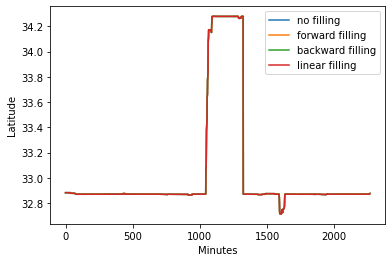

In [ ]:
plt.plot(data['location:raw_latitude'], label='no filling')
plt.plot(fwd_filling['location:raw_latitude'], label='forward filling')
plt.plot(bwd_filling['location:raw_latitude'], label='backward filling')
plt.plot(linear_filling['location:raw_latitude'], label='linear filling')
plt.xlabel('Minutes')
plt.ylabel('Latitude')
plt.legend(loc='upper right')
plt.show()

Compare the 4 traces. What do you see? If you were to use this dataset for further analysis, which filling method will you choose? 


From the plot above, the 4 traces look almost identical. The original data without any filling has some missing values that are computed in all other three fillings. If I had to choose a dataset for further analysis, I would use the linear filling dataset. That is because it takes into account both the previous and the next non-null values (computes their mean and uses it as value), this is especially useful here since the location data is minute-by-minute, so any missing value can be best represented as some combination of previous and next minute values. 